In [28]:
import numpy as np
from scipy.optimize import minimize
from groo.groo import get_root
import matplotlib.pyplot as plt
import pandas as pd
import sys, os
import seaborn as sns

from groo.groo import get_root
rf = get_root(".hidden_root_mc")
sys.path.append(os.path.join(rf))

from models_and_funcs import *

ics = ["AIC", "AICc", "BIC", "HQC"]

In [29]:
# data acrosss four models
dp = os.path.join(rf, "data", "four_models_C")
data = pd.DataFrame()
for f in os.listdir(dp):
    data = pd.concat([data, pd.read_csv(os.path.join(dp, f))])

In [30]:
#data = pd.read_csv(os.path.join(rf, "data", "model_comparison_iter2.csv"))
#data=data.loc[data["algo"].isin(["COBYLA"]),:]

In [31]:
data.head(10)

,Unnamed: 0,noise,cutoff,true_model,algo,best_model_AIC,best_model_AICc,best_model_BIC,best_model_HQC,mean_err_AIC,mean_err_AICc,mean_err_BIC,mean_err_HQC
0,0,5,150,rw1,CG,rw1,rw1,rw1,rw1,2.922358,2.922358,2.922358,2.922358
1,0,5,150,rw1_att,CG,rw1_att,rw1_att,rw1_att,rw1_att,1.214432,1.214432,1.214432,1.214432
2,0,5,150,rw2_val,CG,rw1,rw1,rw1,rw1,2.171593,2.171593,2.171593,2.171593
3,0,5,150,ph_basic,CG,ph_basic,ph_basic,ph_basic,ph_basic,2.457768,2.457768,2.457768,2.457768
4,0,5,150,rw1,CG,rw1,rw1,rw1,rw1,0.127926,0.127926,0.127926,0.127926
5,0,5,150,rw1_att,CG,rw1_att,rw1_att,rw1_att,rw1_att,6.470947,6.470947,6.470947,6.470947
6,0,5,150,rw2_val,CG,rw2_val,rw2_val,rw2_val,rw2_val,1.533756,1.533756,1.533756,1.533756
7,0,5,150,ph_basic,CG,ph_basic,ph_basic,ph_basic,ph_basic,0.853146,0.853146,0.853146,0.853146
8,0,5,150,rw1,CG,rw1,rw1,rw1,rw1,6.074120,6.074120,6.074120,6.074120
9,0,5,150,rw1_att,CG,rw1_att,rw1_att,rw1_att,rw1_att,0.102396,0.102396,0.102396,0.102396


### Correctly identified model


correct_AIC     0.812187
correct_AICc    0.806979
correct_BIC     0.746563
correct_HQC     0.783125
dtype: float64


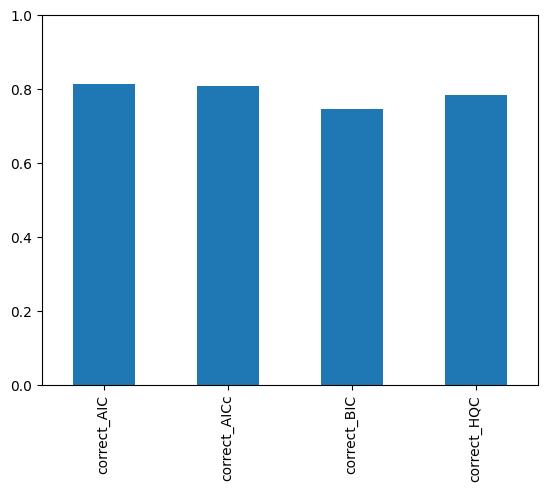

In [32]:
for ic in ics: 
    data["correct_"+ic] = data["true_model"] == data["best_model_"+ic]

data.filter(regex='^correct_').mean().plot.bar(ylim=[0,1])
print(data.filter(regex='^correct_').mean())




In [33]:
df = data.melt(id_vars=["noise", "cutoff", "true_model", "algo", "best_model_AIC", "best_model_AICc", "best_model_BIC", "best_model_HQC"], 
               value_vars=["correct_"+ic for ic in ics]) 
df["IC"] = df["variable"].str.replace("correct_", "")

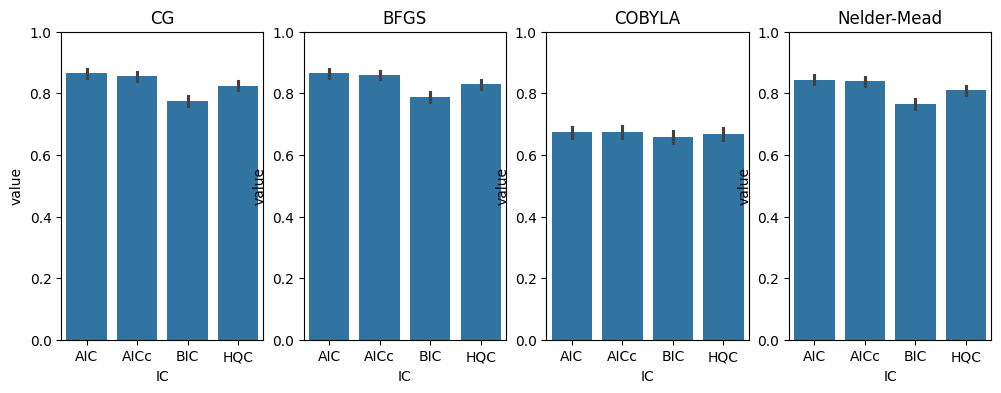

In [34]:
f, ax = plt.subplots(1,4,figsize=(12,4))
for aidx, a in enumerate(data["algo"].unique()):
    sns.barplot(data =df.loc[df["algo"].isin([a]),:], x="IC", y="value", ax=ax[aidx])
    ax[aidx].set_title(a)
    ax[aidx].set_ylim([0,1])
    #data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean().plot.bar(ylim=[0,1], title=a)
    #print(data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean())

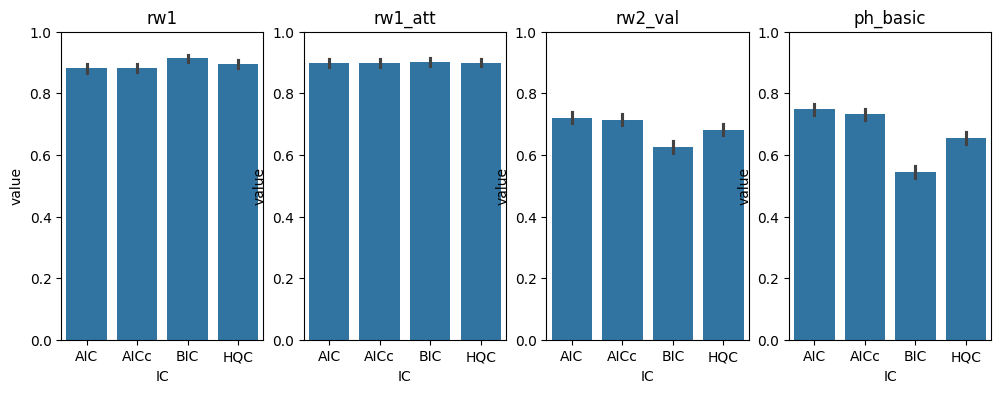

In [35]:
f, ax = plt.subplots(1,4,figsize=(12,4))
for aidx, a in enumerate(data["true_model"].unique()):
    sns.barplot(data =df.loc[df["true_model"].isin([a]),:], x="IC", y="value", ax=ax[aidx])
    ax[aidx].set_title(a)
    ax[aidx].set_ylim([0,1])
    #data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean().plot.bar(ylim=[0,1], title=a)
    #print(data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean())




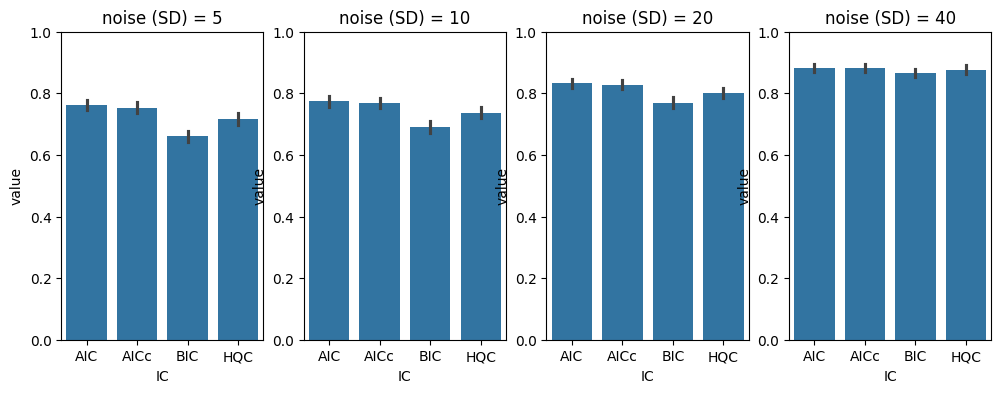

In [36]:
f, ax = plt.subplots(1,4,figsize=(12,4))
for aidx, a in enumerate(data["noise"].unique()):
    sns.barplot(data =df.loc[df["noise"].isin([a]),:], x="IC", y="value", ax=ax[aidx])
    ax[aidx].set_title("noise (SD) = "+str(a))
    ax[aidx].set_ylim([0,1])
    #data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean().plot.bar(ylim=[0,1], title=a)
    #print(data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean())



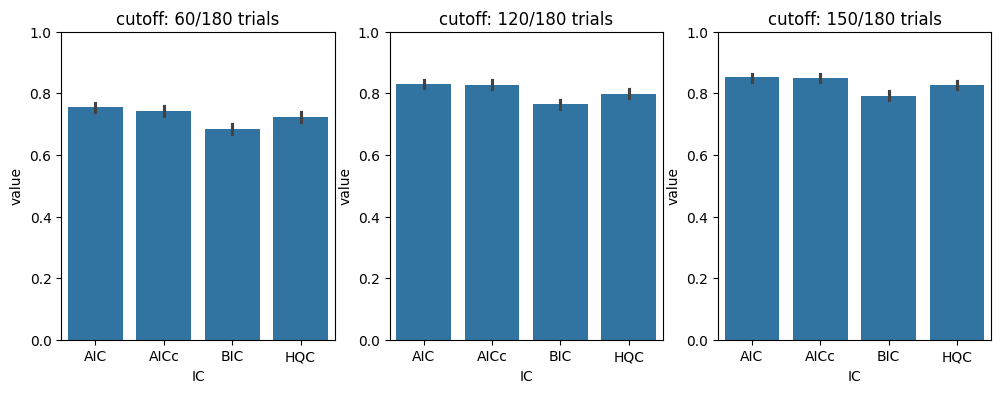

In [40]:
f, ax = plt.subplots(1,3,figsize=(12,4))
for aidx, a in enumerate([60, 120, 150]):
    sns.barplot(data =df.loc[df["cutoff"].isin([a]),:], x="IC", y="value", ax=ax[aidx])
    ax[aidx].set_title("cutoff: "+str(a)+"/180 trials")
    ax[aidx].set_ylim([0,1])
    #data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean().plot.bar(ylim=[0,1], title=a)
    #print(data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean())



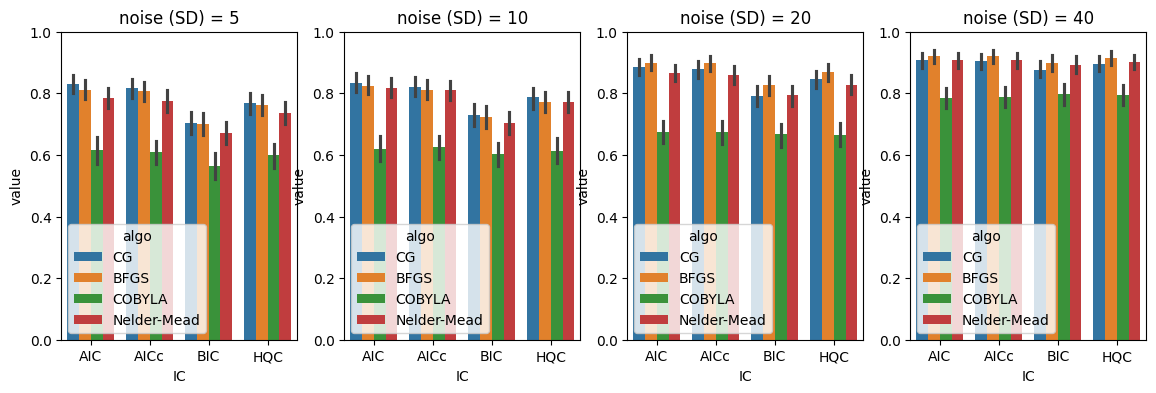

In [12]:
f, ax = plt.subplots(1,4,figsize=(14,4))
for aidx, a in enumerate(data["noise"].unique()):
    sns.barplot(data =df.loc[df["noise"].isin([a]),:], x="IC", y="value", hue="algo", hue_order=df["algo"].unique(), ax=ax[aidx])
    ax[aidx].set_title("noise (SD) = "+str(a))
    ax[aidx].set_ylim([0,1])
    #data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean().plot.bar(ylim=[0,1], title=a)
    #print(data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean())


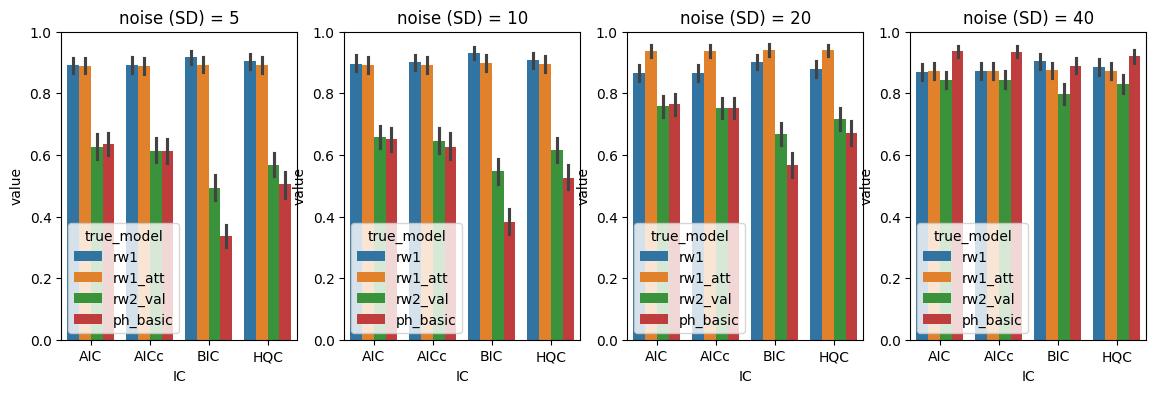

In [13]:
f, ax = plt.subplots(1,4,figsize=(14,4))
for aidx, a in enumerate(data["noise"].unique()):
    sns.barplot(data =df.loc[df["noise"].isin([a]),:], x="IC", y="value", hue="true_model", hue_order=df["true_model"].unique(), ax=ax[aidx])
    ax[aidx].set_title("noise (SD) = "+str(a))
    ax[aidx].set_ylim([0,1])
    #data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean().plot.bar(ylim=[0,1], title=a)
    #print(data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean())

<AxesSubplot: xlabel='noise'>

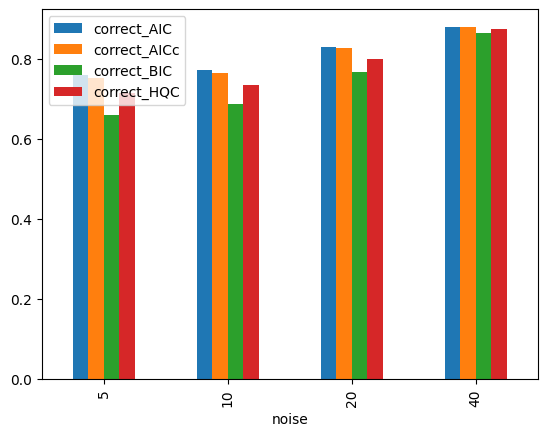

In [14]:
tdf = data.loc[:, ["noise"]+["correct_"+ic for  ic in ics]]
tdf.groupby(by="noise").mean().plot.bar()

<AxesSubplot: xlabel='cutoff'>

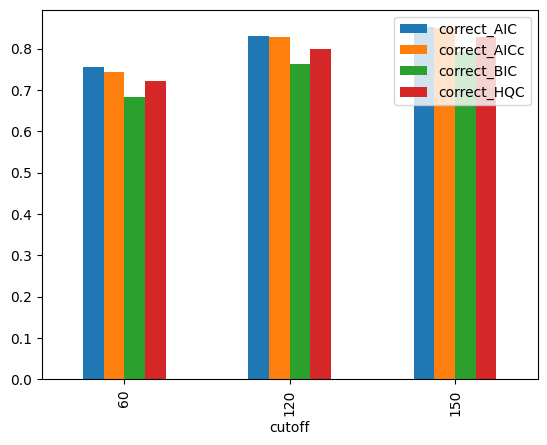

In [15]:
tdf = data.loc[:, ["cutoff"]+["correct_"+ic for  ic in ics]]
tdf.groupby(by="cutoff").mean().plot.bar()

### Mean error

In [16]:
data

,Unnamed: 0,noise,cutoff,true_model,algo,best_model_AIC,best_model_AICc,best_model_BIC,best_model_HQC,mean_err_AIC,mean_err_AICc,mean_err_BIC,mean_err_HQC,correct_AIC,correct_AICc,correct_BIC,correct_HQC
0,0,5,150,rw1,CG,rw1,rw1,rw1,rw1,2.922358,2.922358,2.922358,2.922358,True,True,True,True
1,0,5,150,rw1_att,CG,rw1_att,rw1_att,rw1_att,rw1_att,1.214432,1.214432,1.214432,1.214432,True,True,True,True
2,0,5,150,rw2_val,CG,rw1,rw1,rw1,rw1,2.171593,2.171593,2.171593,2.171593,False,False,False,False
3,0,5,150,ph_basic,CG,ph_basic,ph_basic,ph_basic,ph_basic,2.457768,2.457768,2.457768,2.457768,True,True,True,True
4,0,5,150,rw1,CG,rw1,rw1,rw1,rw1,0.127926,0.127926,0.127926,0.127926,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,40,60,ph_basic,CG,rw1,rw1,rw1,rw1,3.322174,3.322174,3.322174,3.322174,False,False,False,False
196,0,40,60,rw1,CG,rw1,rw1,rw1,rw1,0.057994,0.057994,0.057994,0.057994,True,True,True,True
197,0,40,60,rw1_att,CG,rw1,rw1,rw1,rw1,7.053409,7.053409,7.053409,7.053409,False,False,False,False
198,0,40,60,rw2_val,CG,rw2_val,rw2_val,rw2_val,rw2_val,0.372939,0.372939,0.372939,0.372939,True,True,True,True


In [43]:
df = data.melt(id_vars=["noise", "cutoff", "true_model", "algo", "best_model_AIC", "best_model_AICc", "best_model_BIC", "best_model_HQC"], 
               value_vars=["mean_err_"+ic for ic in ics]) 
df["IC"] = df["variable"].str.replace("mean_err_", "")

In [44]:
df = df.loc[df["value"]!=np.inf,]
df = df.loc[df["value"]<100,:]

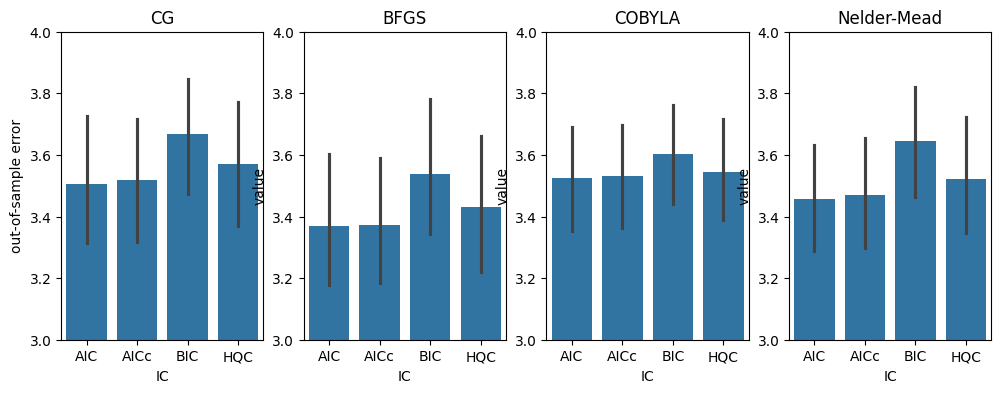

In [47]:
f, ax = plt.subplots(1,4,figsize=(12,4))
for aidx, a in enumerate(data["algo"].unique()):
    sns.barplot(data =df.loc[df["algo"].isin([a]),:], x="IC", y="value", ax=ax[aidx])
    ax[aidx].set_title(a)
    ax[0].set_ylabel("out-of-sample error")
    ax[aidx].set_ylim([3,4])
    #data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean().plot.bar(ylim=[0,1], title=a)
    #print(data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean())

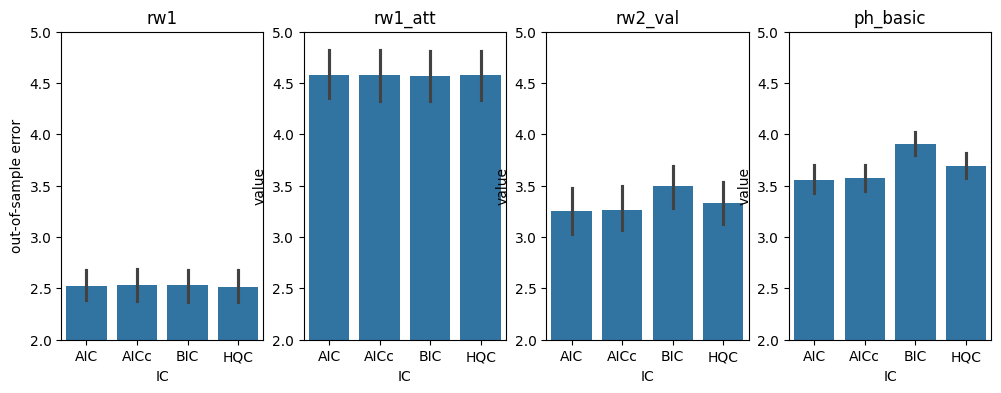

In [50]:
f, ax = plt.subplots(1,4,figsize=(12,4))
for aidx, a in enumerate(data["true_model"].unique()):
    sns.barplot(data =df.loc[df["true_model"].isin([a]),:], x="IC", y="value", ax=ax[aidx])
    ax[aidx].set_title(a)
    ax[0].set_ylabel("out-of-sample error")
    ax[aidx].set_ylim([2,5])
    #data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean().plot.bar(ylim=[0,1], title=a)
    #print(data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean())




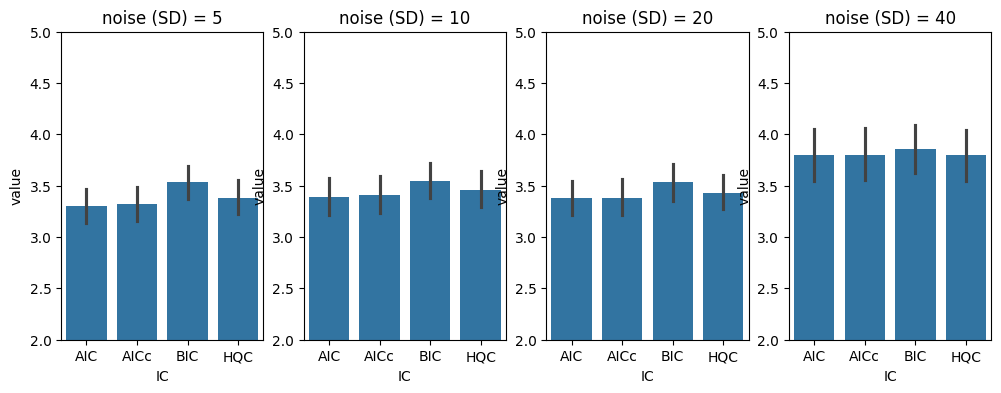

In [51]:
f, ax = plt.subplots(1,4,figsize=(12,4))
for aidx, a in enumerate([5,10,20,40]):
    sns.barplot(data =df.loc[df["noise"].isin([a]),:], x="IC", y="value", ax=ax[aidx])
    ax[aidx].set_title("noise (SD) = "+str(a))
    ax[aidx].set_ylim([2,5])
    #data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean().plot.bar(ylim=[0,1], title=a)
    #print(data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean())



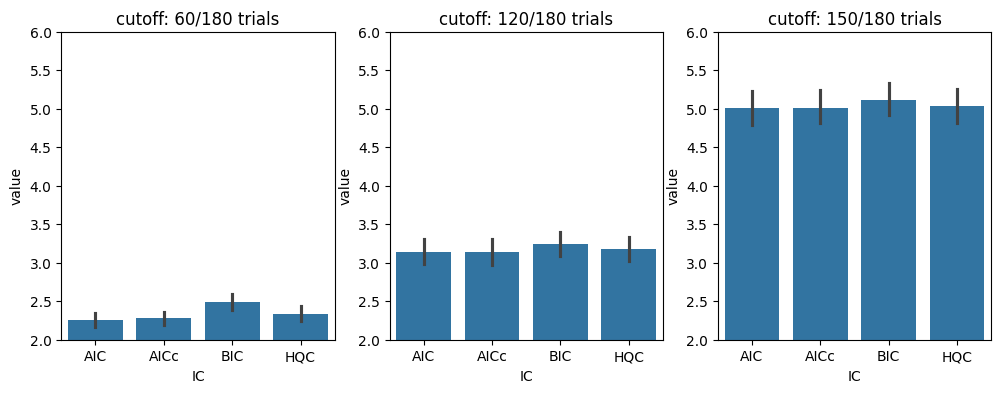

In [54]:
f, ax = plt.subplots(1,3,figsize=(12,4))
for aidx, a in enumerate([60, 120, 150]):
    sns.barplot(data =df.loc[df["cutoff"].isin([a]),:], x="IC", y="value", ax=ax[aidx])
    ax[aidx].set_title("cutoff: "+str(a)+"/180 trials")
    ax[aidx].set_ylim([2,6])
    #data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean().plot.bar(ylim=[0,1], title=a)
    #print(data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean())



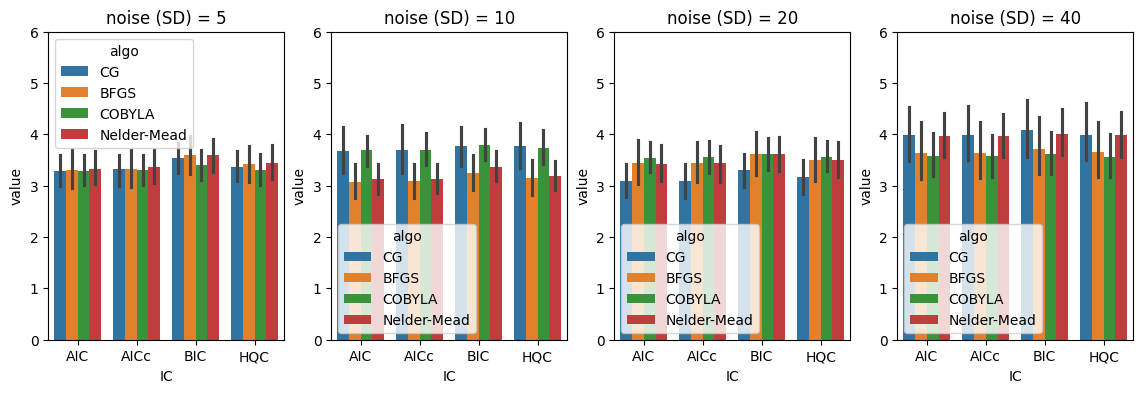

In [55]:
f, ax = plt.subplots(1,4,figsize=(14,4))
for aidx, a in enumerate(data["noise"].unique()):
    sns.barplot(data =df.loc[df["noise"].isin([a]),:], x="IC", y="value", hue="algo", hue_order=df["algo"].unique(), ax=ax[aidx])
    ax[aidx].set_title("noise (SD) = "+str(a))
    ax[aidx].set_ylim([0,6])
    #data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean().plot.bar(ylim=[0,1], title=a)
    #print(data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean())

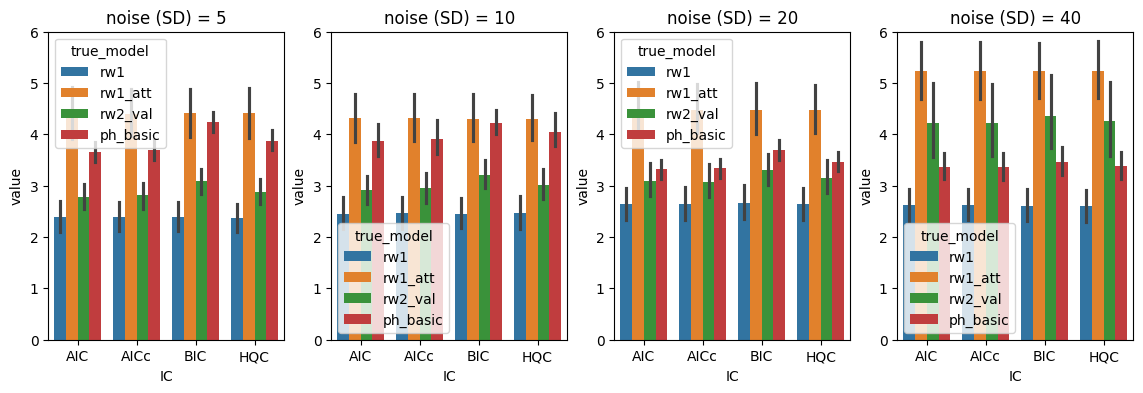

In [57]:
f, ax = plt.subplots(1,4,figsize=(14,4))
leg = True
for aidx, a in enumerate(data["noise"].unique()):
    
    sns.barplot(data =df.loc[df["noise"].isin([a]),:], x="IC", y="value", hue="true_model", hue_order=df["true_model"].unique(), ax=ax[aidx], legend=leg)
    ax[aidx].set_title("noise (SD) = "+str(a))
    ax[aidx].set_ylim([0,6])
    leg=False
    #data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean().plot.bar(ylim=[0,1], title=a)
    #print(data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean())

mean_err_AIC     2.112690
mean_err_AICc    2.135121
mean_err_BIC     2.343710
mean_err_HQC     2.198180
dtype: float64


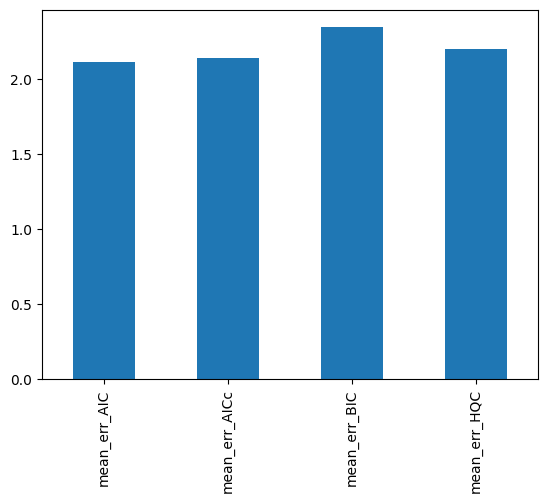

In [24]:

data.filter(regex='^mean_err_').median().plot.bar()
print(data.filter(regex='^mean_err_').median())

<AxesSubplot: xlabel='true_model'>

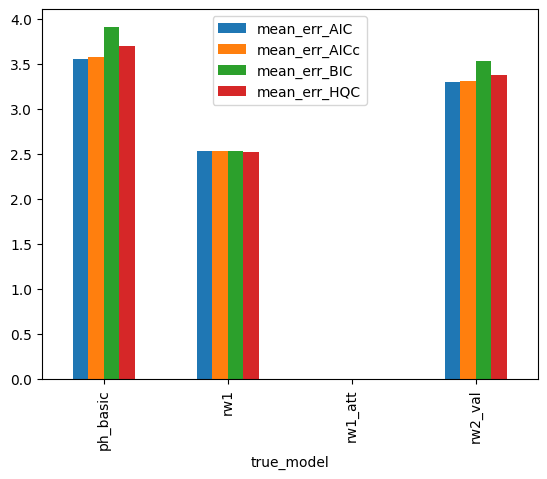

In [25]:
tdf = data.loc[:, ["true_model"]+["mean_err_"+ic for  ic in ics]]
tdf.groupby(by="true_model").mean().plot.bar()

<AxesSubplot: xlabel='noise'>

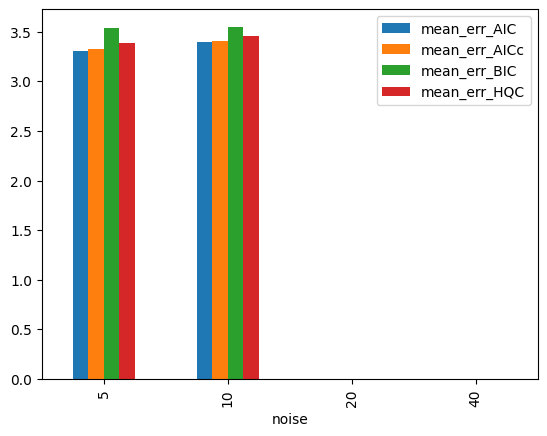

In [26]:
tdf = data.loc[:, ["noise"]+["mean_err_"+ic for  ic in ics]]
tdf.groupby(by="noise").mean().plot.bar()

In [27]:
tdf = data.loc[:, ["cutoff"]+["mean_err_"+ic for  ic in ics]]

#tdf.groupby(by="cutoff").mean().plot.bar()
bdf = tdf.melt(id_vars=["cutoff"], value_vars=["mean_err_"+ic for  ic in ics], var_name="IC", value_name="score")
bdf = bdf.loc[~np.isinf(bdf["score"]),:]
bdf=bdf.dropna()
bdf["score"] = bdf["score"].astype(float)
f, ax = plt.subplots(1,1,figsize=(12,3))       
sns.swarmplot(data=bdf, x="IC", y="score", hue="cutoff", ax=ax)
#bdf["score"].hist()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f532e69e950> (for post_execute):


KeyboardInterrupt: 